Precisión del modelo: 66.67%


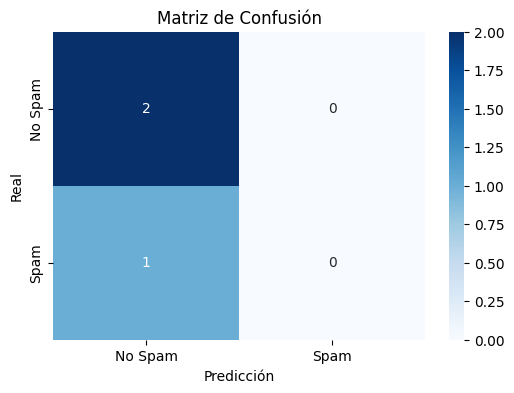

In [2]:
# Importar las bibliotecas necesarias
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Crear un conjunto de datos simple de correos (texto) y etiquetas (spam o no spam)
data = {
    'email': [
        'Gana dinero fácil desde casa',
        'Oferta especial solo para ti',
        'Reunión de trabajo mañana',
        'Tu factura está lista para descargar',
        'Invierte en criptomonedas y duplica tus ingresos',
        'Reporte de ventas mensual adjunto',
        'Este es un recordatorio de tu cita médica',
        '50% de descuento en nuestra tienda online',
        'Tu contraseña ha sido cambiada con éxito',
        '¡No pierdas esta oportunidad única para ganar un premio!'
    ],
    'label': ['spam', 'spam', 'no spam', 'no spam', 'spam', 'no spam', 'no spam', 'spam', 'no spam', 'spam']
}

# Cargar los datos en un DataFrame de pandas
df = pd.DataFrame(data)

# Separar las características (texto del correo) y las etiquetas (spam o no spam)
X = df['email']
y = df['label']

# Convertir el texto en una matriz de conteo de palabras usando CountVectorizer
vectorizer = CountVectorizer()
X_vectorized = vectorizer.fit_transform(X)

# Dividir los datos en un conjunto de entrenamiento y un conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.3, random_state=42)

# Crear el modelo de Naive Bayes
model = MultinomialNB()

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy * 100:.2f}%')

# Generar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Crear un gráfico de la matriz de confusión
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Spam', 'Spam'], yticklabels=['No Spam', 'Spam'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()
